# GO-CAM Slimmer Analysis

This notebook demonstrates:
1. Fetching all GO-CAM models
2. Using the indexer to get biological process (BP) closures
3. Using OAK to get GO slim categories (configurable)
4. Creating heatmaps showing:
   - Number of models for each GO slim category
   - Co-occurrence of GO slim terms across models

## Configuration

Edit the configuration variables in the second cell to:
- Change the GO slim subset (default: `goslim_generic`)
- Limit the number of models to fetch for testing

In [16]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from typing import List, Dict, Set
import logging

# GO-CAM imports
from gocam.translation import MinervaWrapper
from gocam.indexing.indexer import Indexer
from gocam.datamodel import Model

# OAK imports
from oaklib import get_adapter

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# CONFIGURATION
# Change this to use a different GO slim
# Examples: "goslim_generic", "goslim_agr", "goslim_yeast", "goslim_plant"
GOSLIM_SUBSET = "goslim_generic"

# Number of models to fetch (set to None to fetch all)
NUM_MODELS = None  # Will fetch all models; change to e.g. 100 for testing

## Step 1: Fetch All GO-CAM Models

We'll fetch a subset of models for demonstration. In production, you might want to fetch all models.

In [ ]:
# Initialize the Minerva wrapper
wrapper = MinervaWrapper()

# Get all model IDs
print("Fetching model IDs...")
all_model_ids = list(wrapper.models_ids())
print(f"Total number of models: {len(all_model_ids)}")

# Use configuration to determine how many models to fetch
if NUM_MODELS is not None:
    model_ids_subset = all_model_ids[:NUM_MODELS]
    print(f"\nFetching {len(model_ids_subset)} models (configured limit)...")
else:
    model_ids_subset = all_model_ids
    print(f"\nFetching all {len(model_ids_subset)} models...")

In [19]:
# Fetch models and index them
models = []
indexer = Indexer()

for i, model_id in enumerate(model_ids_subset):
    if i % 10 == 0:
        print(f"Progress: {i}/{len(model_ids_subset)}")
    
    try:
        # Fetch the model
        model = wrapper.fetch_model(model_id)
        
        # Index the model to add closures and other computed fields
        indexer.index_model(model)
        
        models.append(model)
    except Exception as e:
        logger.warning(f"Failed to fetch/index model {model_id}: {e}")

print(f"\nSuccessfully fetched and indexed {len(models)} models")

INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/56170d5200000012


Progress: 0/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:56170d5200000012
INFO:root:Locator: obo:go
INFO:root:Ensuring gunzipped for https://s3.amazonaws.com/bbop-sqlite/go.db.gz
INFO:root:Locator, post-processed: sqlite:////Users/cjm/.data/oaklib/go.db
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/568b0f9600000284
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:568b0f9600000284
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5745387b00001516
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5745387b00001516
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/57c82fad00000695
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:57c82fad00000695
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/586fc17a00000

Progress: 10/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5b91dbd100002057
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5b91dbd100002241
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5b91dbd100002241
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5ce58dde00000937
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5ce58dde00000937
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5ce58dde00001215
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5ce58dde00001215
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5d29221b00002847
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5d29221b00002847
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 20/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5ee8120100001898
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5ee8120100002841
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5ee8120100002841
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5f46c3b700000011
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5f46c3b700000011
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5f46c3b700001031
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5f46c3b700001031
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5f46c3b700001407
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5f46c3b700001407
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 30/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fa76ad400000018
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fa76ad400000110
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fa76ad400000110
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fa76ad400000265
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fa76ad400000265
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fa76ad400000374
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fa76ad400000374
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fadbcf000000317
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fadbcf000000317
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 40/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fadbcf000001646
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fadbcf000001962
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fadbcf000001962
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fadbcf000002042
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fadbcf000002042
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fadbcf000002129
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fadbcf000002129
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fadbcf000002236
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fadbcf000002236
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 50/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fce9b7300000434
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fce9b7300001590
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fce9b7300001590
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fce9b7300001616
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fce9b7300001616
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fce9b7300001742
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fce9b7300001742
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/5fce9b7300002336
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:5fce9b7300002336
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 60/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60418ffa00001019
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60418ffa00001124
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60418ffa00001124
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60418ffa00001200
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60418ffa00001200
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60418ffa00001258
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60418ffa00001258
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60418ffa00001536
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60418ffa00001536
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 70/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60ad85f700000058
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60ad85f700000110
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60ad85f700000110
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60ad85f700000189
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60ad85f700000189
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60ad85f700000259
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60ad85f700000259
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60ad85f700000309
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60ad85f700000309
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 80/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60ad85f700003015
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60ad85f700003288
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60ad85f700003288
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60d5209a00000233
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60d5209a00000233
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60d5209a00000521
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60d5209a00000521
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60d5209a00001406
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60d5209a00001406
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 90/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60ff660000000917
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/60ff660000001341
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:60ff660000001341
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/61283a3000000217
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:61283a3000000217
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/613aae0000000040
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:613aae0000000040
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/613aae0000000061
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:613aae0000000061
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 100/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:613aae0000001005
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/614fa6f900000500
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:614fa6f900000500
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6168d1e000000007
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6168d1e000000007
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/617b481400000389
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:617b481400000389
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/617b481400000460
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:617b481400000460
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 110/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:617b481400002743
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/617b481400003575
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:617b481400003575
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6197061700000593
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6197061700000593
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6197061700000616
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6197061700000616
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6197061700001485
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6197061700001485
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 120/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6197061700002226
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6197061700002298
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6197061700002298
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6197061700002320
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6197061700002320
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6197061700002397
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6197061700002397
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6197061700003490
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6197061700003490
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 130/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:61b2b68300000408
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/61b2b68300000617
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:61b2b68300000617
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/61e0e55600000239
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:61e0e55600000239
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/61e0e55600000338
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:61e0e55600000338
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/61e0e55600000407
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:61e0e55600000407
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 140/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:61e0e55600002253
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/61f34dd300000000
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:61f34dd300000000
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/61f34dd300000787
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:61f34dd300000787
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/61f34dd300000863
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:61f34dd300000863
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/61f34dd300000981
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:61f34dd300000981
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 150/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6205c24300001663
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62183af000000536
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62183af000000536
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62183af000000874
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62183af000000874
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/622aace900000413
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:622aace900000413
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/622aace900000443
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:622aace900000443
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 160/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:623d156d00000029
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/623d156d00000290
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:623d156d00000290
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/623d156d00000340
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:623d156d00000340
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/623d156d00000673
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:623d156d00000673
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/623d156d00000699
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:623d156d00000699
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 170/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6246724f00000369
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6246724f00000549
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6246724f00000549
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6246724f00000632
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6246724f00000632
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6246724f00000675
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6246724f00000675
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6246724f00000763
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6246724f00000763
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 180/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6258b8f300000816
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/626b20c100000025
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:626b20c100000025
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/626b20c100000185
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:626b20c100000185
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/626b20c100000443
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:626b20c100000443
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/626b20c100000681
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:626b20c100000681
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 190/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:627d95ee00000718
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/627d95ee00000757
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:627d95ee00000757
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/627d95ee00000775
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:627d95ee00000775
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/627d95ee00000909
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:627d95ee00000909
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/627d95ee00000955
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:627d95ee00000955
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 200/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:627d95ee00001988
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/627d95ee00002030
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:627d95ee00002030
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/627d95ee00002067
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:627d95ee00002067
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/627d95ee00002159
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:627d95ee00002159
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62900b6400000022
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62900b6400000022
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 210/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62900b6400001631
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62900b6400001749
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62900b6400001749
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62900b6400001815
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62900b6400001815
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62900b6400001836
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62900b6400001836
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62900b6400002267
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62900b6400002267
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 220/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300000081
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300000240
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300000240
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300000241
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300000241
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300000335
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300000335
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300000418
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300000418
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 230/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300001832
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300002284
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300002284
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300002340
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300002340
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300002385
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300002385
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300002470
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300002470
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 240/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300002896
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300002925
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300002925
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300002959
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300002959
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300003074
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300003074
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300003248
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300003248
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 250/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300003679
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300003703
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300003703
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300003746
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300003746
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300003747
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300003747
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300003754
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300003754
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 260/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300004589
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300004795
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300004795
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300004857
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300004857
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300004892
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300004892
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300004953
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300004953
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 270/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300005283
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300005342
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300005342
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300005389
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300005389
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300005437
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300005437
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300005467
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300005467
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 280/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300006086
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300006258
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300006258
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300006335
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300006335
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300006376
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300006376
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62b4ffe300006474
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62b4ffe300006474
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 290/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62d0afa500001250
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62e3212700000469
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62e3212700000469
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62e3212700000746
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62e3212700000746
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62e3212700001602
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62e3212700001602
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62e3212700001653
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62e3212700001653
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 300/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800000378
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800000464
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800000464
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800000841
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800000841
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800000934
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800000934
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800001022
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800001022
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 310/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800001738
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800002020
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800002020
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800002184
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800002184
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800002367
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800002367
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800002485
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800002485
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 320/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800004529
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800004747
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800004747
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800004803
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800004803
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800004946
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800004946
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800005094
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800005094
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 330/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800006008
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800006039
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800006039
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800006248
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800006248
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800006555
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800006555
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/62f58d8800006739
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:62f58d8800006739
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 340/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:632cf60a00000028
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/632cf60a00000169
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:632cf60a00000169
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/632cf60a00000478
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:632cf60a00000478
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/632cf60a00000522
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:632cf60a00000522
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/632cf60a00000788
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:632cf60a00000788
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 350/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:633b013300001469
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/633b013300001722
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:633b013300001722
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6348a65d00000093
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6348a65d00000093
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6348a65d00000136
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6348a65d00000136
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6348a65d00000452
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6348a65d00000452
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 360/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6348a65d00000724
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6348a65d00000848
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6348a65d00000848
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6348a65d00001191
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6348a65d00001191
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6348a65d00001727
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6348a65d00001727
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6348a65d00002142
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6348a65d00002142
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 370/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6348a65d00002993
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/635b1e3e00000382
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:635b1e3e00000382
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/635b1e3e00000433
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:635b1e3e00000433
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/635b1e3e00001811
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:635b1e3e00001811
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/635b1e3e00002003
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:635b1e3e00002003
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 380/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:636d9ce800000147
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/636d9ce800000943
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:636d9ce800000943
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/636d9ce800001192
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:636d9ce800001192
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/636d9ce800001222
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:636d9ce800001222
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/636d9ce800001276
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:636d9ce800001276
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 390/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63894f2500000788
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63894f2500000826
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63894f2500000826
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63894f2500000870
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63894f2500000870
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63894f2500001094
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63894f2500001094
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63894f2500001248
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63894f2500001248
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 400/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63894f2500001894
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63894f2500002043
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63894f2500002043
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/639bc18f00000028
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:639bc18f00000028
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/639bc18f00000054
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:639bc18f00000054
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/639bc18f00000090
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:639bc18f00000090
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 410/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63a86a8600000805
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63a86a8600001202
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63a86a8600001202
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63a86a8600001248
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63a86a8600001248
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63a86a8600001279
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63a86a8600001279
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63a86a8600001314
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63a86a8600001314
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 420/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63a86a8600001865
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63c0ac2b00000008
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63c0ac2b00000008
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63c0ac2b00000088
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63c0ac2b00000088
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63c0ac2b00000267
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63c0ac2b00000267
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63c0ac2b00000331
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63c0ac2b00000331
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 430/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63c0ac2b00000641
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63c0ac2b00001143
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63c0ac2b00001143
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63c0ac2b00001252
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63c0ac2b00001252
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63c0ac2b00001566
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63c0ac2b00001566
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63c0ac2b00001613
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63c0ac2b00001613
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 440/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63d320cd00001536
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63d320cd00001588
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63d320cd00001588
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63d320cd00001688
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63d320cd00001688
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63d320cd00001733
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63d320cd00001733
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63d320cd00001779
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63d320cd00001779
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 450/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63e5937500000591
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63e5937500000997
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63e5937500000997
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63e5937500001029
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63e5937500001029
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63e5937500001279
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63e5937500001279
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63e5937500001319
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63e5937500001319
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 460/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63f809ec00000560
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63f809ec00000611
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63f809ec00000611
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63f809ec00000635
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63f809ec00000635
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63f809ec00000701
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63f809ec00000701
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/63f809ec00001308
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:63f809ec00001308
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 470/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6413ac9800000256
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6413ac9800000654
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6413ac9800000654
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/641ce4dc00000050
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:641ce4dc00000050
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/641ce4dc00000214
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:641ce4dc00000214
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/641ce4dc00000430
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:641ce4dc00000430
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 480/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6438950a00000624
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6438950a00000714
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6438950a00000714
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6438950a00000766
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6438950a00000766
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6446bfcb00000006
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6446bfcb00000006
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6446bfcb00000031
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6446bfcb00000031
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 490/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6446bfcb00001243
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6446bfcb00001336
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6446bfcb00001336
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6446bfcb00001774
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6446bfcb00001774
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/645d887900000245
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:645d887900000245
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/645d887900000271
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:645d887900000271
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 500/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:645d887900000758
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/645d887900000999
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:645d887900000999
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/645d887900001077
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:645d887900001077
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/645d887900001078
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:645d887900001078
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/645d887900001323
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:645d887900001323
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 510/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100000239
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100000391
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100000391
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100000611
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100000611
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100000838
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100000838
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100001061
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100001061
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 520/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100002308
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100002557
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100002557
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100002802
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100002802
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100003125
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100003125
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100003362
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100003362
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 530/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100004457
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100004606
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100004606
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100004848
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100004848
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100004973
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100004973
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/646ff70100005032
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:646ff70100005032
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 540/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6482692800000330
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6482692800000498
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6482692800000498
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6482692800000701
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6482692800000701
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6482692800001029
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6482692800001029
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6482692800001393
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6482692800001393
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 550/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6482692800002312
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6482692800002523
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6482692800002523
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6482692800002614
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6482692800002614
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/648d0dc100000022
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:648d0dc100000022
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/648d0dc100000075
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:648d0dc100000075
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 560/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:648d0dc100001547
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6494e2e900000134
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6494e2e900000134
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6494e2e900000187
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6494e2e900000187
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6494e2e900001469
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6494e2e900001469
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6494e2e900001496
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6494e2e900001496
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 570/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64c3044100000089
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64c3044100000125
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64c3044100000125
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64c3044100000910
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64c3044100000910
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64c3044100001129
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64c3044100001129
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64c3044100001348
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64c3044100001348
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 580/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64d5781900000281
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64d5781900000443
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64d5781900000443
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64d5781900000615
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64d5781900000615
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64d5781900001969
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64d5781900001969
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64d5781900002033
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64d5781900002033
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 590/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64e7eefa00000854
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64e7eefa00001233
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64e7eefa00001233
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64e7eefa00001258
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64e7eefa00001258
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64e7eefa00001299
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64e7eefa00001299
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/64e7eefa00001978
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:64e7eefa00001978
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 600/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65039e8700000967
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65039e8700001110
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65039e8700001110
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65039e8700001188
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65039e8700001188
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6516135700000211
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6516135700000211
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6516135700000380
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6516135700000380
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 610/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65288b2200000496
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65288b2200000643
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65288b2200000643
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65288b2200001166
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65288b2200001166
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65288b2200001218
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65288b2200001218
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65288b2200001267
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65288b2200001267
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 620/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:653b0ce600000673
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/653b0ce600000721
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:653b0ce600000721
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/653b0ce600000800
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:653b0ce600000800
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/653b0ce600001230
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:653b0ce600001230
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/653b0ce600001283
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:653b0ce600001283
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 630/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:654d809000000248
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/654d809000000802
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:654d809000000802
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/654d809000001411
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:654d809000001411
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/654d809000001587
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:654d809000001587
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/654d809000001692
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:654d809000001692
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 640/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65692e7e00001241
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65692e7e00001413
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65692e7e00001413
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65692e7e00001542
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65692e7e00001542
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65692e7e00001784
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65692e7e00001784
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65692e7e00001822
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65692e7e00001822
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 650/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:657ba49f00001182
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/657ba49f00001358
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:657ba49f00001358
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/657ba49f00001402
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:657ba49f00001402
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/657ba49f00001888
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:657ba49f00001888
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65a1f4f800000029
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800000029
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 660/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800000617
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65a1f4f800000673
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800000673
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65a1f4f800000855
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800000855
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65a1f4f800000922
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800000922
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65a1f4f800001029
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800001029
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 670/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800001740
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65a1f4f800002022
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800002022
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65a1f4f800002142
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800002142
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65a1f4f800002257
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800002257
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65a1f4f800002442
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800002442
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 680/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800003391
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65a1f4f800003542
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800003542
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65a1f4f800003760
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65a1f4f800003760
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65bc474400000029
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65bc474400000029
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65bc474400000069
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65bc474400000069
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 690/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65bc474400000824
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65bc474400000955
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65bc474400000955
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65bc474400001510
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65bc474400001510
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65bc474400001544
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65bc474400001544
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65c57c3400000000
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65c57c3400000000
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 700/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65c57c3400001018
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65c57c3400001115
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65c57c3400001115
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65c57c3400001478
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65c57c3400001478
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65c57c3400001909
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65c57c3400001909
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65c57c3400001964
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65c57c3400001964
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 710/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65d7e4ac00000022
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65d7e4ac00000082
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65d7e4ac00000082
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65d7e4ac00001084
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65d7e4ac00001084
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65d7e4ac00001282
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65d7e4ac00001282
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65d7e4ac00001363
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65d7e4ac00001363
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 720/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65d7e4ac00002167
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65d7e4ac00002290
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65d7e4ac00002290
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65d7e4ac00002427
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65d7e4ac00002427
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65d7e4ac00002435
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65d7e4ac00002435
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65d7e4ac00002808
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65d7e4ac00002808
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 730/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65f3ae5c00001022
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65f3ae5c00001357
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65f3ae5c00001357
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65f3ae5c00001388
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65f3ae5c00001388
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65f3ae5c00001692
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65f3ae5c00001692
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/65f3ae5c00002132
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:65f3ae5c00002132
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 740/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6606056e00000363
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6606056e00000485
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6606056e00000485
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6606056e00000576
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6606056e00000576
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6606056e00000637
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6606056e00000637
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6606056e00000678
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6606056e00000678
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 750/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6606056e00001371
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6606056e00001418
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6606056e00001418
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6606056e00001462
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6606056e00001462
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6606056e00001507
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6606056e00001507
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6606056e00001551
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6606056e00001551
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 760/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6606056e00002524
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700000078
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700000078
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700000159
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700000159
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700000246
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700000246
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700000318
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700000318
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 770/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700001573
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700001597
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700001597
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700001644
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700001644
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700001712
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700001712
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700001744
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700001744
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 780/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700002637
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700002670
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700002670
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700002704
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700002704
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700002778
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700002778
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66187e4700002881
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66187e4700002881
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 790/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:662af8fa00000408
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/662af8fa00000499
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:662af8fa00000499
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/662af8fa00000691
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:662af8fa00000691
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/662af8fa00000764
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:662af8fa00000764
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/662af8fa00000838
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:662af8fa00000838
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 800/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:662af8fa00002572
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/662af8fa00002657
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:662af8fa00002657
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/662af8fa00002877
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:662af8fa00002877
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/663d668500000226
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:663d668500000226
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/663d668500000296
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:663d668500000296
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 810/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:663d668500001246
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/663d668500001492
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:663d668500001492
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/663d668500001551
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:663d668500001551
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/663d668500001599
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:663d668500001599
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/663d668500001704
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:663d668500001704
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 820/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:663d668500002824
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/663d668500003144
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:663d668500003144
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/663d668500003182
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:663d668500003182
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/663d668500003232
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:663d668500003232
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/665912ed00000015
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:665912ed00000015
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 830/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:665912ed00001850
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/665912ed00001925
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:665912ed00001925
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/665912ed00001983
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:665912ed00001983
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/665912ed00002359
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:665912ed00002359
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/665912ed00002434
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:665912ed00002434
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 840/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:666b894f00000232
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/666b894f00000352
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:666b894f00000352
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/666b894f00000484
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:666b894f00000484
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/666b894f00000518
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:666b894f00000518
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/666b894f00000542
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:666b894f00000542
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 850/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:666b894f00001488
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/666b894f00001546
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:666b894f00001546
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/666b894f00001836
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:666b894f00001836
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/666b894f00002018
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:666b894f00002018
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/666b894f00002043
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:666b894f00002043
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 860/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:667dfe8d00000146
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/667dfe8d00000179
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:667dfe8d00000179
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/667dfe8d00000211
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:667dfe8d00000211
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/667dfe8d00000848
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:667dfe8d00000848
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/667dfe8d00000886
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:667dfe8d00000886
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 870/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:668d5f2700000201
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6690711d00000012
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6690711d00000012
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6690711d00000055
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6690711d00000055
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6690711d00000101
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6690711d00000101
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6690711d00000142
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6690711d00000142
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 880/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6690711d00001696
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6690711d00001733
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6690711d00001733
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6690711d00001771
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6690711d00001771
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6690711d00001806
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6690711d00001806
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6690711d00001844
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6690711d00001844
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 890/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00000443
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66a3e0bb00000525
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00000525
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66a3e0bb00000922
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00000922
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66a3e0bb00001036
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00001036
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66a3e0bb00001076
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00001076
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 900/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00001742
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66a3e0bb00001796
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00001796
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66a3e0bb00001868
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00001868
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66a3e0bb00001882
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00001882
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66a3e0bb00001935
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00001935
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 910/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00002890
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66a3e0bb00002988
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66a3e0bb00002988
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66b5638000000025
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000000025
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66b5638000000056
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000000056
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66b5638000000102
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000000102
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 920/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000000873
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66b5638000001291
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000001291
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66b5638000001329
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000001329
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66b5638000001404
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000001404
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66b5638000001589
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000001589
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 930/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000002031
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66b5638000002185
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000002185
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66b5638000002250
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000002250
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66b5638000002273
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000002273
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66b5638000002450
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66b5638000002450
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 940/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500000163
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66c7d41500000243
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500000243
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66c7d41500000309
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500000309
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66c7d41500000350
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500000350
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66c7d41500000427
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500000427
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 950/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500000841
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66c7d41500000963
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500000963
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66c7d41500001120
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500001120
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66c7d41500001171
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500001171
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66c7d41500001953
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500001953
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 960/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500002919
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66c7d41500003371
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500003371
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66c7d41500003458
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500003458
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66c7d41500003582
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66c7d41500003582
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66e382fb00000012
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00000012
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 970/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00000490
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66e382fb00000583
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00000583
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66e382fb00001097
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00001097
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66e382fb00001148
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00001148
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66e382fb00001225
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00001225
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 980/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00001786
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66e382fb00001913
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00001913
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66e382fb00001997
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00001997
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66e382fb00002105
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00002105
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66e382fb00002243
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00002243
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 990/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66e382fb00003093
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66f5faaa00000026
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66f5faaa00000026
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66f5faaa00000112
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66f5faaa00000112
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66f5faaa00000347
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66f5faaa00000347
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66f5faaa00000441
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66f5faaa00000441
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1000/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66f5faaa00001076
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66f5faaa00001130
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66f5faaa00001130
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66f5faaa00001170
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66f5faaa00001170
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/66f5faaa00001204
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:66f5faaa00001204
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67086be200000251
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67086be200000251
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1010/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67086be200001601
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67086be200001721
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67086be200001721
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67086be200002266
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67086be200002266
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67086be200002592
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67086be200002592
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67086be200002705
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67086be200002705
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1020/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:671ae02600000835
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/671ae02600000964
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:671ae02600000964
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/671ae02600001023
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:671ae02600001023
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/671ae02600001912
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:671ae02600001912
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/671ae02600001961
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:671ae02600001961
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1030/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:671ae02600002752
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/671ae02600002812
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:671ae02600002812
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/671ae02600003150
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:671ae02600003150
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/671ae02600003194
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:671ae02600003194
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/671ae02600003459
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:671ae02600003459
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1040/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600000120
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600000368
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600000368
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600000404
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600000404
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600000417
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600000417
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600000521
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600000521
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1050/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600001410
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600001439
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600001439
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600001710
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600001710
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600001853
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600001853
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600001890
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600001890
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1060/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600003097
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600003135
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600003135
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600003173
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600003173
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600003532
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600003532
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600003835
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600003835
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1070/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600004836
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600005223
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600005223
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600005262
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600005262
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600005945
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600005945
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67369e7600006071
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67369e7600006071
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1080/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:675b862c00000159
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/675b862c00000185
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:675b862c00000185
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/675b862c00000211
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:675b862c00000211
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/675b862c00000237
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:675b862c00000237
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/675b862c00000861
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:675b862c00000861
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1090/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900000255
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/678073a900000353
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900000353
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/678073a900000393
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900000393
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/678073a900001135
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900001135
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/678073a900001471
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900001471
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1100/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900002117
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/678073a900002636
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900002636
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/678073a900002931
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900002931
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/678073a900003175
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900003175
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/678073a900003437
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900003437
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1110/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900003616
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/678073a900003657
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900003657
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/678073a900003708
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900003708
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/678073a900003902
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:678073a900003902
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00000009
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00000009
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1120/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00001105
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00001431
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00001431
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00001560
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00001560
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00001607
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00001607
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00001787
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00001787
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1130/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00003358
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00004222
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00004222
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00004574
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00004574
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00004743
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00004743
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00004884
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00004884
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1140/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00006015
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00006045
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00006045
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00006250
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00006250
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00006325
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00006325
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/6796b94c00006392
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:6796b94c00006392
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1150/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100000953
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100001098
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100001098
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100001260
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100001260
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100001304
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100001304
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100001426
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100001426
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1160/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100002611
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100002643
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100002643
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100002705
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100002705
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100002770
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100002770
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100003101
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100003101
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1170/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100003856
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100004023
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100004023
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100004130
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100004130
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100004168
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100004168
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67b1629100004300
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67b1629100004300
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1180/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400001765
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400001799
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400001799
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400001896
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400001896
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400002026
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400002026
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400002721
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400002721
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1190/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400004380
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400004457
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400004457
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400004508
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400004508
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400004549
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400004549
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400004816
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400004816
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1200/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400005671
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400005742
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400005742
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400005826
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400005826
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400006615
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400006615
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67c10cc400006997
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67c10cc400006997
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1210/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67e5e74400000671
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67e5e74400000919
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67e5e74400000919
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67e5e74400001094
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67e5e74400001094
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67e5e74400001269
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67e5e74400001269
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67e5e74400001614
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67e5e74400001614
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1220/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67e5e74400002668
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67e5e74400002819
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67e5e74400002819
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67e5e74400003073
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67e5e74400003073
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67e5e74400003200
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67e5e74400003200
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67e5e74400003294
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67e5e74400003294
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1230/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67f85f2b00000459
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67f85f2b00000823
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67f85f2b00000823
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67f85f2b00001360
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67f85f2b00001360
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67f85f2b00001619
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67f85f2b00001619
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67f85f2b00002096
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67f85f2b00002096
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1240/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67f85f2b00003626
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67f85f2b00003942
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67f85f2b00003942
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67f85f2b00003986
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67f85f2b00003986
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67f85f2b00004288
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67f85f2b00004288
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/67f85f2b00004380
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:67f85f2b00004380
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1250/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200001682
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200002493
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200002493
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200002702
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200002702
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200002791
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200002791
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200002857
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200002857
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1260/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200003171
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200003271
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200003271
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200003421
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200003421
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200003422
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200003422
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200003459
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200003459
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1270/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200005738
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200005774
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200005774
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200005824
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200005824
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200006012
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200006012
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/680ad14200006125
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:680ad14200006125
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1280/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:682fbcd000002323
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/682fbcd000002354
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:682fbcd000002354
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/682fbcd000002455
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:682fbcd000002455
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/682fbcd000002579
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:682fbcd000002579
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/682fbcd000002800
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:682fbcd000002800
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.or

Progress: 1290/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_ALLANTOINDEG-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_ARG-PRO-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_ARG-PRO-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_ARGDEG-YEAST-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_ARGDEG-YEAST-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_ARGSPECAT-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_ARGSPECAT-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_ARGSYNBSUB-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_

Progress: 1300/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_BRANCHED-CHAIN-AA-SYN-PWY-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_BSUBPOLYAMSYN-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_BSUBPOLYAMSYN-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_CITRUL-BIO2-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_CITRUL-BIO2-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_COMPLETE-ARO-PWY-1
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_COMPLETE-ARO-PWY-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_CYSTEINE-SYN2-PWY
INFO:gocam.translation.minerva_wrapper:Processin

Progress: 1310/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_FOLSYN-PWY-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_GLUCFERMEN-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_GLUCFERMEN-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_GLUCONEO-PWY-1
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_GLUCONEO-PWY-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_GLUCOSE-MANNOSYL-CHITO-DOLICHOL
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_GLUCOSE-MANNOSYL-CHITO-DOLICHOL
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_GLUDEG-I-PWY-1
INFO:gocam.translation.minerva_wrapper:Processin

Progress: 1320/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_GLYOXYLATE-BYPASS
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_HEME-BIOSYNTHESIS-II
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_HEME-BIOSYNTHESIS-II
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_HEXPPSYN-PWY-2
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_HEXPPSYN-PWY-2
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_HISTSYN-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_HISTSYN-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_HOMOCYS-CYS-CONVERT
INFO:gocam.translation.minerva_wrapper:Processing model id: gomode

Progress: 1330/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_LEUSYN-PWY-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_LYSDEGII-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_LYSDEGII-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_LYSINE-AMINOAD-PWY-2
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_LYSINE-AMINOAD-PWY-2
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_NADSYN-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_NADSYN-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_NONOXIPENT-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_

Progress: 1340/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PHOS-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PHOSLIPSYN2-PWY-1
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PHOSLIPSYN2-PWY-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PLPSAL-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PLPSAL-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_POLYAMSYN-YEAST-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_POLYAMSYN-YEAST-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PROSYN-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_

Progress: 1350/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-5041
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-5080-1
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-5080-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-5084
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-5084
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-5123
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-5123
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-5177
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-5177
INFO:gocam.translation.minerva_wr

Progress: 1360/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-5669
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-5670-1
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-5670-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-5686-1
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-5686-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-5694
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-5694
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-5697
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-5697
INFO:gocam.translation.minerv

Progress: 1370/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-6122-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-6123-1
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-6123-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-6125
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-6125
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-6126-1
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-6126-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-6147
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-6147
INFO:gocam.translation.mine

Progress: 1380/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-7220-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-7221
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-7221
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-7222-1
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-7222-1
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-781
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-781
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY-821-1
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY-821-1
INFO:gocam.translation.minerva_

Progress: 1390/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-10
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-1109
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-1109
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-114
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-114
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-123
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-123
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-13
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-13
INFO:gocam.translation.minerv

Progress: 1400/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-1874
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-188
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-188
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-19
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-19
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-2
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-2
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-20
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-20
INFO:gocam.translation.minerva_wrap

Progress: 1410/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-261
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-285
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-285
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-31704
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-31704
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-335
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-335
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-351
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-351
INFO:gocam.translation.m

Progress: 1420/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-4106
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-4107
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-4107
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-4108
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-4108
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-4109
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-4109
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-4112
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-4112
INFO:gocam.translat

Progress: 1430/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-440
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-45
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-45
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-450
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-450
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-50
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-50
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-5268
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-5268
INFO:gocam.translation.minerva

Progress: 1440/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-6407
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-6499
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-6499
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-6635
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-6635
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-69
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-69
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-697
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-697
INFO:gocam.translation.mi

Progress: 1450/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-94
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-954
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-954
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWY3O-981
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWY3O-981
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PWYQT-4432
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PWYQT-4432
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_PYRIMID-RNTSYN-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_PYRIMID-RNTSYN-PWY
INFO:goca

Progress: 1460/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_TCA-EUK-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_THIOREDOX-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_THIOREDOX-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_THREOCAT2-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_THREOCAT2-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_THRESYN-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_THRESYN-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_TRESYN-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_TRESYN-PWY
INFO

Progress: 1470/1477


INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_YEAST-4AMINOBUTMETAB-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_YEAST-DE-NOVO-PYRMID-DNT
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_YEAST-DE-NOVO-PYRMID-DNT
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_YEAST-FAO-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_YEAST-FAO-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_YEAST-GALACT-METAB-PWY
INFO:gocam.translation.minerva_wrapper:Processing model id: gomodel:YeastPathways_YEAST-GALACT-METAB-PWY
INFO:gocam.translation.minerva_wrapper:Fetch Minerva JSON from: https://api.geneontology.org/api/go-cam/YeastPathways_YEAST-RIBOSYN-PWY
INFO:gocam.translation.minerva_wr


Successfully fetched and indexed 1468 models


## Step 2: Extract Biological Process Closures

The indexer adds closure information to each model. We'll extract all BP terms from the closures.

In [55]:
GOSLIM_SUBSET = "goslim_agr"

In [56]:
# Extract all BP terms from model closures
all_bp_terms = set()
model_bp_terms = {}  # Map from model ID to set of BP terms

for model in models:
    if model.query_index and model.query_index.model_activity_part_of_closure:
        bp_terms = set([t.id for t in model.query_index.model_activity_part_of_closure])
        all_bp_terms.update(bp_terms)
        model_bp_terms[model.id] = bp_terms

print(f"Total unique BP terms across all models: {len(all_bp_terms)}")
print(f"\nSample BP terms: {list(all_bp_terms)[:10]}")

Total unique BP terms across all models: 3793

Sample BP terms: ['GO:0045722', 'GO:0009223', 'GO:0006542', 'GO:0042278', 'GO:0071675', 'GO:0031445', 'GO:0061615', 'GO:0006413', 'GO:0034162', 'GO:0030488']


## Step 3: Get GO Slim Generic Categories Using OAK

We'll use OAK to:
1. Get the GO slim generic subset
2. Map our BP terms to their GO slim ancestors

In [57]:
# Initialize OAK adapter for GO
print("Initializing OAK adapter for GO...")
oak_adapter = get_adapter("sqlite:obo:go")

# Get GO slim subset based on configuration
print(f"Fetching GO slim subset: {GOSLIM_SUBSET}...")
try:
    goslim_terms = list(oak_adapter.subset_members(GOSLIM_SUBSET))
    print(f"Found {len(goslim_terms)} terms in {GOSLIM_SUBSET}")
except Exception as e:
    print(f"Error fetching subset {GOSLIM_SUBSET}: {e}")
    print("Available subsets:")
    for subset in oak_adapter.subsets():
        if "slim" in subset.lower():
            print(f"  - {subset}")
    raise

# Filter for BP terms only (GO:0008150 and descendants)
bp_root = "GO:0008150"
goslim_bp_terms = []

for term in goslim_terms:
    if term.startswith("GO:"):
        # Check if this term is a BP term
        ancestors = list(oak_adapter.ancestors(term, predicates=["rdfs:subClassOf"]))
        if bp_root in ancestors or term == bp_root:
            goslim_bp_terms.append(term)

print(f"\n{GOSLIM_SUBSET} BP terms: {len(goslim_bp_terms)}")

# Get labels for GO slim terms
goslim_labels = {}
for term in goslim_bp_terms:
    label = oak_adapter.label(term)
    if label:
        goslim_labels[term] = label
        if len(goslim_bp_terms) <= 20:  # Only print if not too many
            print(f"{term}: {label}")

INFO:root:Locator: obo:go
INFO:root:Ensuring gunzipped for https://s3.amazonaws.com/bbop-sqlite/go.db.gz
INFO:root:Locator, post-processed: sqlite:////Users/cjm/.data/oaklib/go.db


Initializing OAK adapter for GO...
Fetching GO slim subset: goslim_agr...
Found 53 terms in goslim_agr

goslim_agr BP terms: 21


In [58]:
# Map each BP term to its GO slim ancestors
print("\nMapping BP terms to GO slim categories...")
bp_to_goslim = defaultdict(set)

# For each BP term in our models, find its GO slim ancestors
for bp_term in all_bp_terms:
    if bp_term.startswith("GO:"):
        try:
            # Get ancestors of this term
            ancestors = set(oak_adapter.ancestors(bp_term, predicates=["rdfs:subClassOf"]))
            ancestors.add(bp_term)  # Include the term itself
            
            # Find which GO slim terms are ancestors
            slim_ancestors = ancestors.intersection(set(goslim_bp_terms))
            
            for slim_term in slim_ancestors:
                bp_to_goslim[bp_term].add(slim_term)
        except Exception as e:
            logger.warning(f"Failed to get ancestors for {bp_term}: {e}")

print(f"Mapped {len(bp_to_goslim)} BP terms to GO slim categories")


Mapping BP terms to GO slim categories...
Mapped 1726 BP terms to GO slim categories


## Step 4: Count Models per GO Slim Category

In [59]:
# Count how many models are associated with each GO slim category
goslim_model_counts = Counter()

for model_id, bp_terms in model_bp_terms.items():
    # Find all GO slim categories for this model
    model_slim_terms = set()
    
    for bp_term in bp_terms:
        if bp_term in bp_to_goslim:
            model_slim_terms.update(bp_to_goslim[bp_term])
    
    # Count this model for each of its GO slim categories
    for slim_term in model_slim_terms:
        goslim_model_counts[slim_term] += 1

# Create a dataframe for visualization
slim_data = []
for slim_term, count in goslim_model_counts.items():
    label = goslim_labels.get(slim_term, slim_term)
    slim_data.append({
        'term': slim_term,
        'label': label,
        'count': count
    })

df_slim = pd.DataFrame(slim_data)
df_slim = df_slim.sort_values('count', ascending=False)

print("\nTop 10 GO slim categories by model count:")
print(df_slim.head(10))


Top 10 GO slim categories by model count:
          term                                      label  count
2   GO:0050896                       response to stimulus    687
8   GO:0023052                                  signaling    531
6   GO:0019538                  protein metabolic process    333
3   GO:0009056                          catabolic process    235
1   GO:0002376                      immune system process    169
9   GO:0051234              establishment of localization    164
14  GO:0016043            cellular component organization    148
4   GO:1901135  carbohydrate derivative metabolic process    127
12  GO:0006629                    lipid metabolic process     91
5   GO:0005975             carbohydrate metabolic process     61


## Step 5: Create Heatmap Visualization

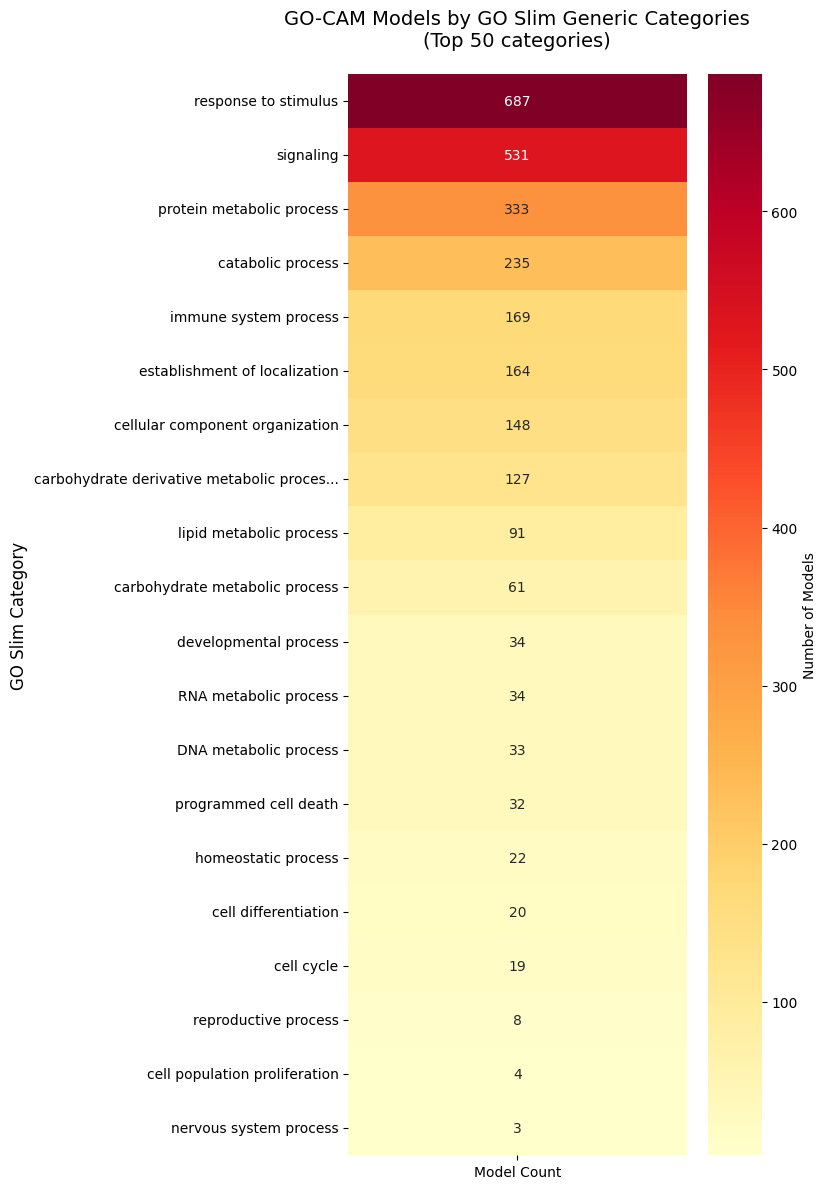

In [60]:
# Prepare data for heatmap
# We'll create a matrix with GO slim categories as rows and a single column for counts

# Filter to top N categories for better visualization
top_n = 50
df_top = df_slim.head(top_n)

# Create figure
plt.figure(figsize=(8, 12))

# Prepare data for heatmap
heatmap_data = df_top[['count']].values
y_labels = [f"{row['label'][:40]}..." if len(row['label']) > 40 else row['label'] 
            for _, row in df_top.iterrows()]

# Create heatmap
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='d',
            cmap='YlOrRd',
            xticklabels=['Model Count'],
            yticklabels=y_labels,
            cbar_kws={'label': 'Number of Models'})

plt.title(f'GO-CAM Models by GO Slim Generic Categories\n(Top {top_n} categories)', 
          fontsize=14, pad=20)
plt.xlabel('')
plt.ylabel('GO Slim Category', fontsize=12)
plt.tight_layout()
plt.show()

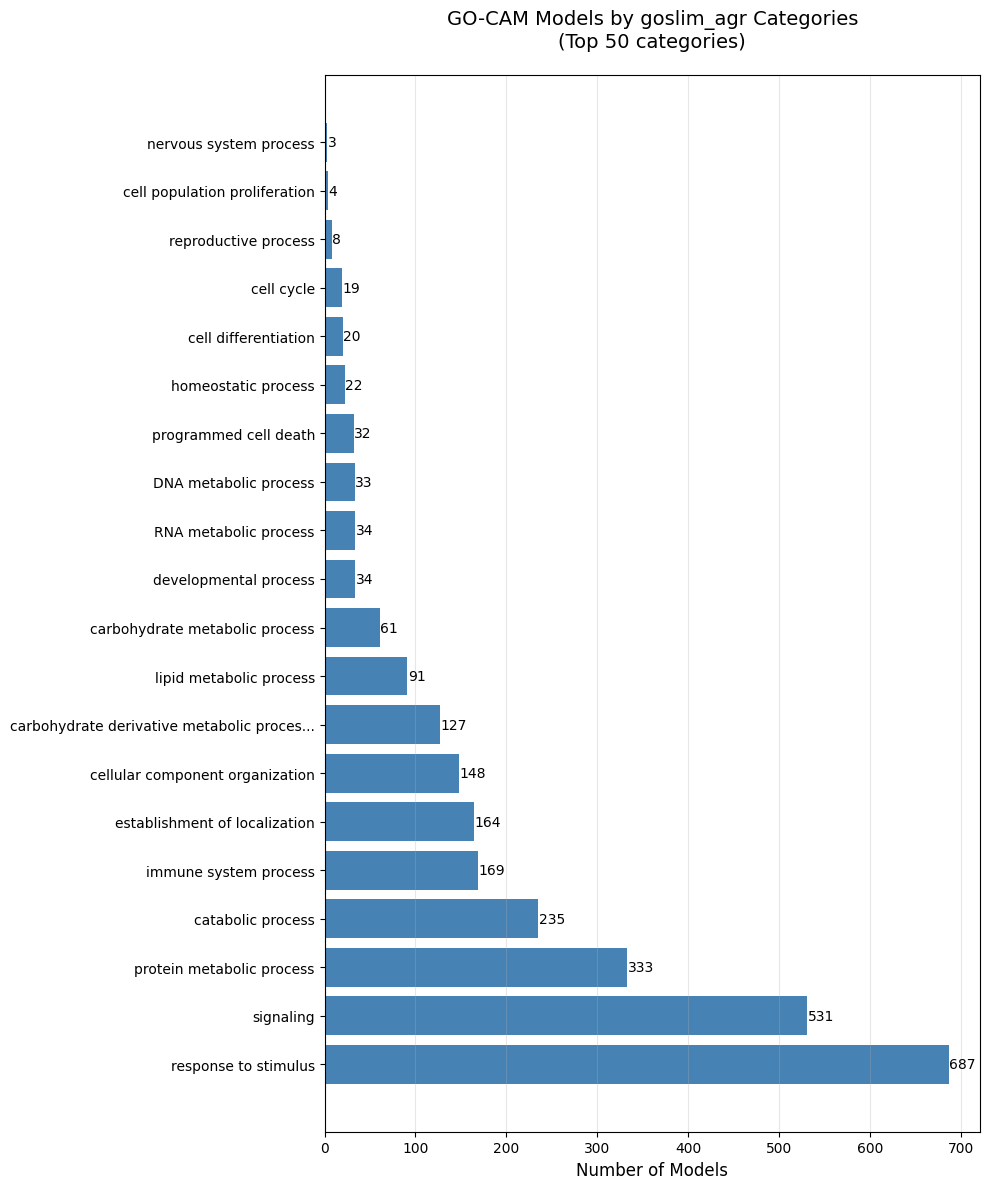

In [61]:
# Alternative visualization: Horizontal bar chart
plt.figure(figsize=(10, 12))

# Create horizontal bar chart
y_pos = np.arange(len(df_top))
plt.barh(y_pos, df_top['count'].values, color='steelblue')

# Customize the plot
plt.yticks(y_pos, y_labels)
plt.xlabel('Number of Models', fontsize=12)
plt.title(f'GO-CAM Models by {GOSLIM_SUBSET} Categories\n(Top {top_n} categories)', 
          fontsize=14, pad=20)

# Add value labels on bars
for i, (_, row) in enumerate(df_top.iterrows()):
    plt.text(row['count'] + 0.5, i, str(row['count']), 
             va='center', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(f'gocam_{GOSLIM_SUBSET}_bar_chart.png', dpi=300)
plt.show()

## Summary Statistics

In [62]:
# Print summary statistics
print(f"Summary Statistics:")
print(f"==================")
print(f"Total models analyzed: {len(models)}")
print(f"Total unique BP terms: {len(all_bp_terms)}")
print(f"Total GO slim BP categories: {len(goslim_bp_terms)}")
print(f"GO slim categories with at least one model: {len(goslim_model_counts)}")
print(f"\nAverage models per GO slim category: {df_slim['count'].mean():.1f}")
print(f"Median models per GO slim category: {df_slim['count'].median():.1f}")
print(f"Max models in a category: {df_slim['count'].max()} ({df_slim.iloc[0]['label']})")

Summary Statistics:
Total models analyzed: 1468
Total unique BP terms: 3793
Total GO slim BP categories: 21
GO slim categories with at least one model: 20

Average models per GO slim category: 137.8
Median models per GO slim category: 47.5
Max models in a category: 687 (response to stimulus)


In [63]:
# Export results to CSV for further analysis
output_file = f"gocam_{GOSLIM_SUBSET}_analysis.csv"
df_slim.to_csv(output_file, index=False)
print(f"\nResults exported to: {output_file}")


Results exported to: gocam_goslim_agr_analysis.csv


## Step 6: Create GO Slim Term Overlap Heatmap

Now we'll create a T x T heatmap showing the overlap between GO slim terms - i.e., how many models are annotated with both terms.

In [64]:
# Create a mapping of models to their GO slim terms
model_to_slim_terms = {}

for model_id, bp_terms in model_bp_terms.items():
    # Find all GO slim categories for this model
    model_slim_terms = set()
    
    for bp_term in bp_terms:
        if bp_term in bp_to_goslim:
            model_slim_terms.update(bp_to_goslim[bp_term])
    
    if model_slim_terms:
        model_to_slim_terms[model_id] = model_slim_terms

print(f"Models with GO slim annotations: {len(model_to_slim_terms)}")

# Get the most common GO slim terms for the overlap matrix
# We'll use the top N terms to keep the heatmap readable
top_n_overlap = 30
top_slim_terms = [term for term, _ in goslim_model_counts.most_common(top_n_overlap)]

# Create the overlap matrix
overlap_matrix = np.zeros((len(top_slim_terms), len(top_slim_terms)))

for i, term1 in enumerate(top_slim_terms):
    for j, term2 in enumerate(top_slim_terms):
        # Count models that have both term1 and term2
        overlap_count = 0
        for model_id, slim_terms in model_to_slim_terms.items():
            if term1 in slim_terms and term2 in slim_terms:
                overlap_count += 1
        overlap_matrix[i, j] = overlap_count

# Create labels for the heatmap
term_labels = [goslim_labels.get(term, term)[:30] + "..." 
               if len(goslim_labels.get(term, term)) > 30 
               else goslim_labels.get(term, term) 
               for term in top_slim_terms]

print(f"Created {len(top_slim_terms)} x {len(top_slim_terms)} overlap matrix")

Models with GO slim annotations: 1238
Created 20 x 20 overlap matrix


ValueError: Unknown format code 'd' for object of type 'float'

<Figure size 1600x1400 with 0 Axes>

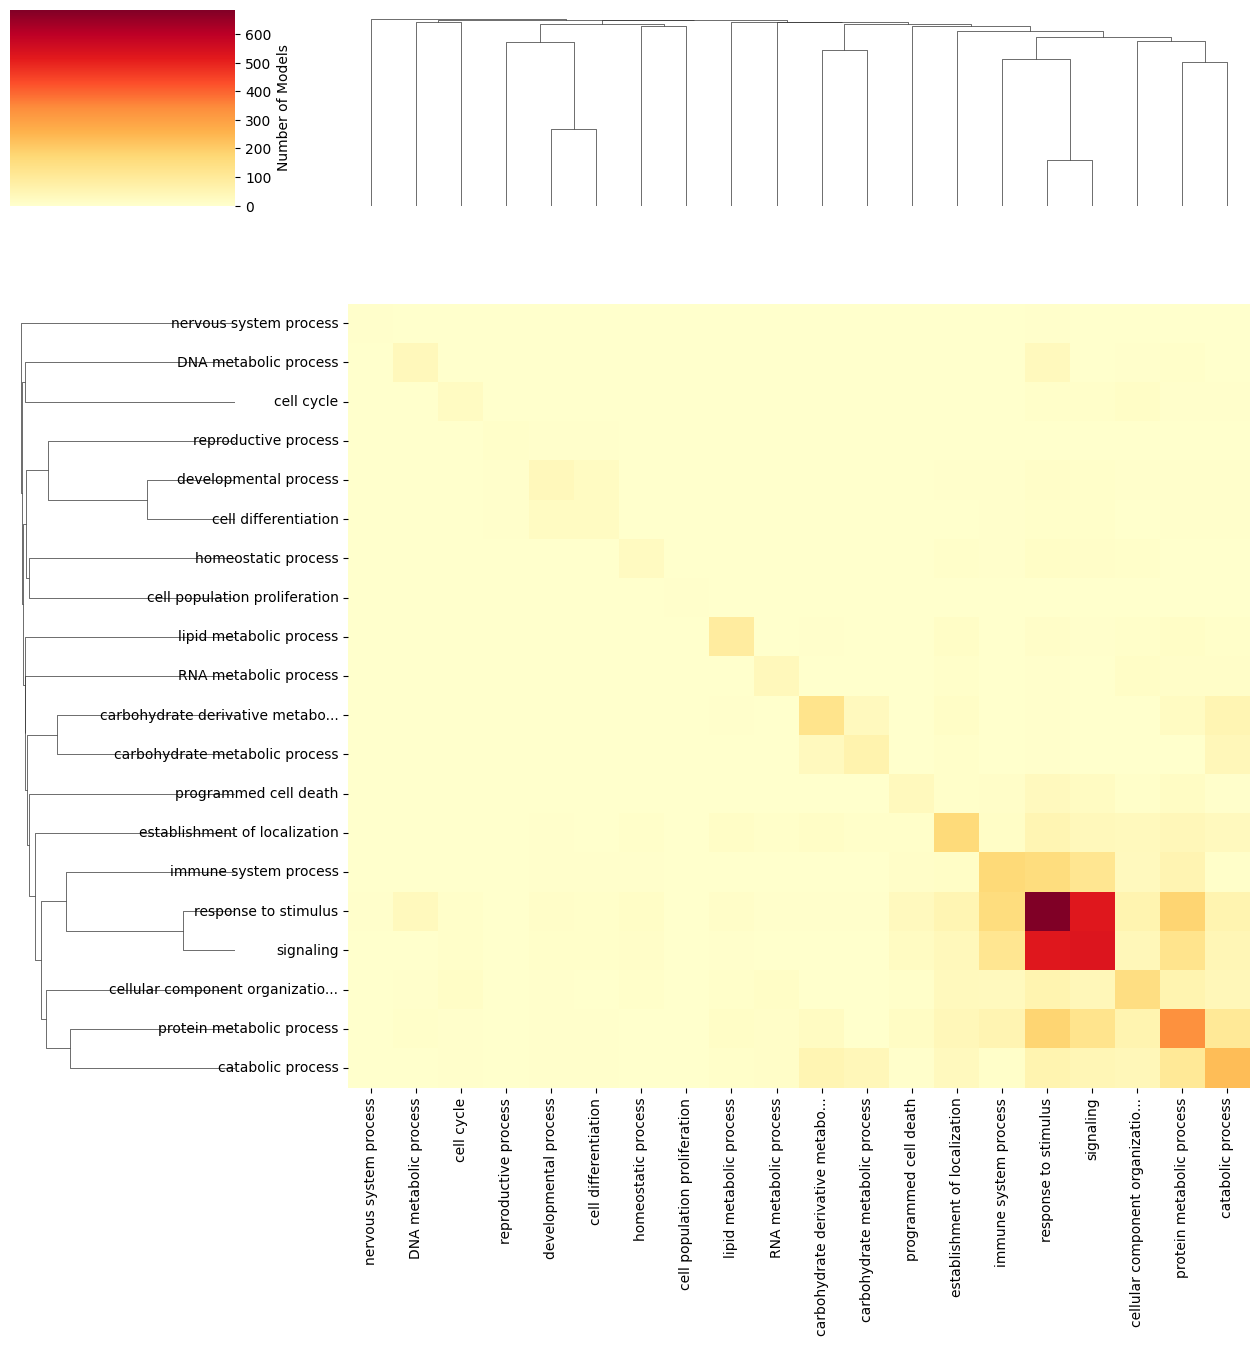

In [65]:
# Create the clustered heatmap
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform

# Convert overlap matrix to a distance matrix for clustering
# We'll use Jaccard distance (1 - Jaccard similarity)
# For each pair of terms, Jaccard similarity = intersection / union
distance_matrix = np.zeros((len(top_slim_terms), len(top_slim_terms)))

for i in range(len(top_slim_terms)):
    for j in range(len(top_slim_terms)):
        if i == j:
            distance_matrix[i, j] = 0
        else:
            intersection = overlap_matrix[i, j]
            # Union is the number of models with term i OR term j
            # = models with term i + models with term j - intersection
            union = overlap_matrix[i, i] + overlap_matrix[j, j] - intersection
            if union > 0:
                jaccard_sim = intersection / union
                distance_matrix[i, j] = 1 - jaccard_sim
            else:
                distance_matrix[i, j] = 1

# Perform hierarchical clustering
linkage = hierarchy.linkage(squareform(distance_matrix), method='average')

# Create the figure
plt.figure(figsize=(16, 14))

# Create clustermap
g = sns.clustermap(overlap_matrix,
                   row_linkage=linkage,
                   col_linkage=linkage,
                   xticklabels=term_labels,
                   yticklabels=term_labels,
                   cmap='YlOrRd',
                   annot=True,
                   fmt='d',
                   cbar_kws={'label': 'Number of Models'},
                   figsize=(16, 14),
                   annot_kws={'size': 8})

# Rotate labels for better readability
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

g.fig.suptitle(f'{GOSLIM_SUBSET} Term Co-occurrence in GO-CAM Models\n(Top {top_n_overlap} categories, clustered)', 
               fontsize=16, y=0.995)

plt.tight_layout()
plt.savefig(f'gocam_{GOSLIM_SUBSET}_overlap_clustered.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1600x1400 with 0 Axes>

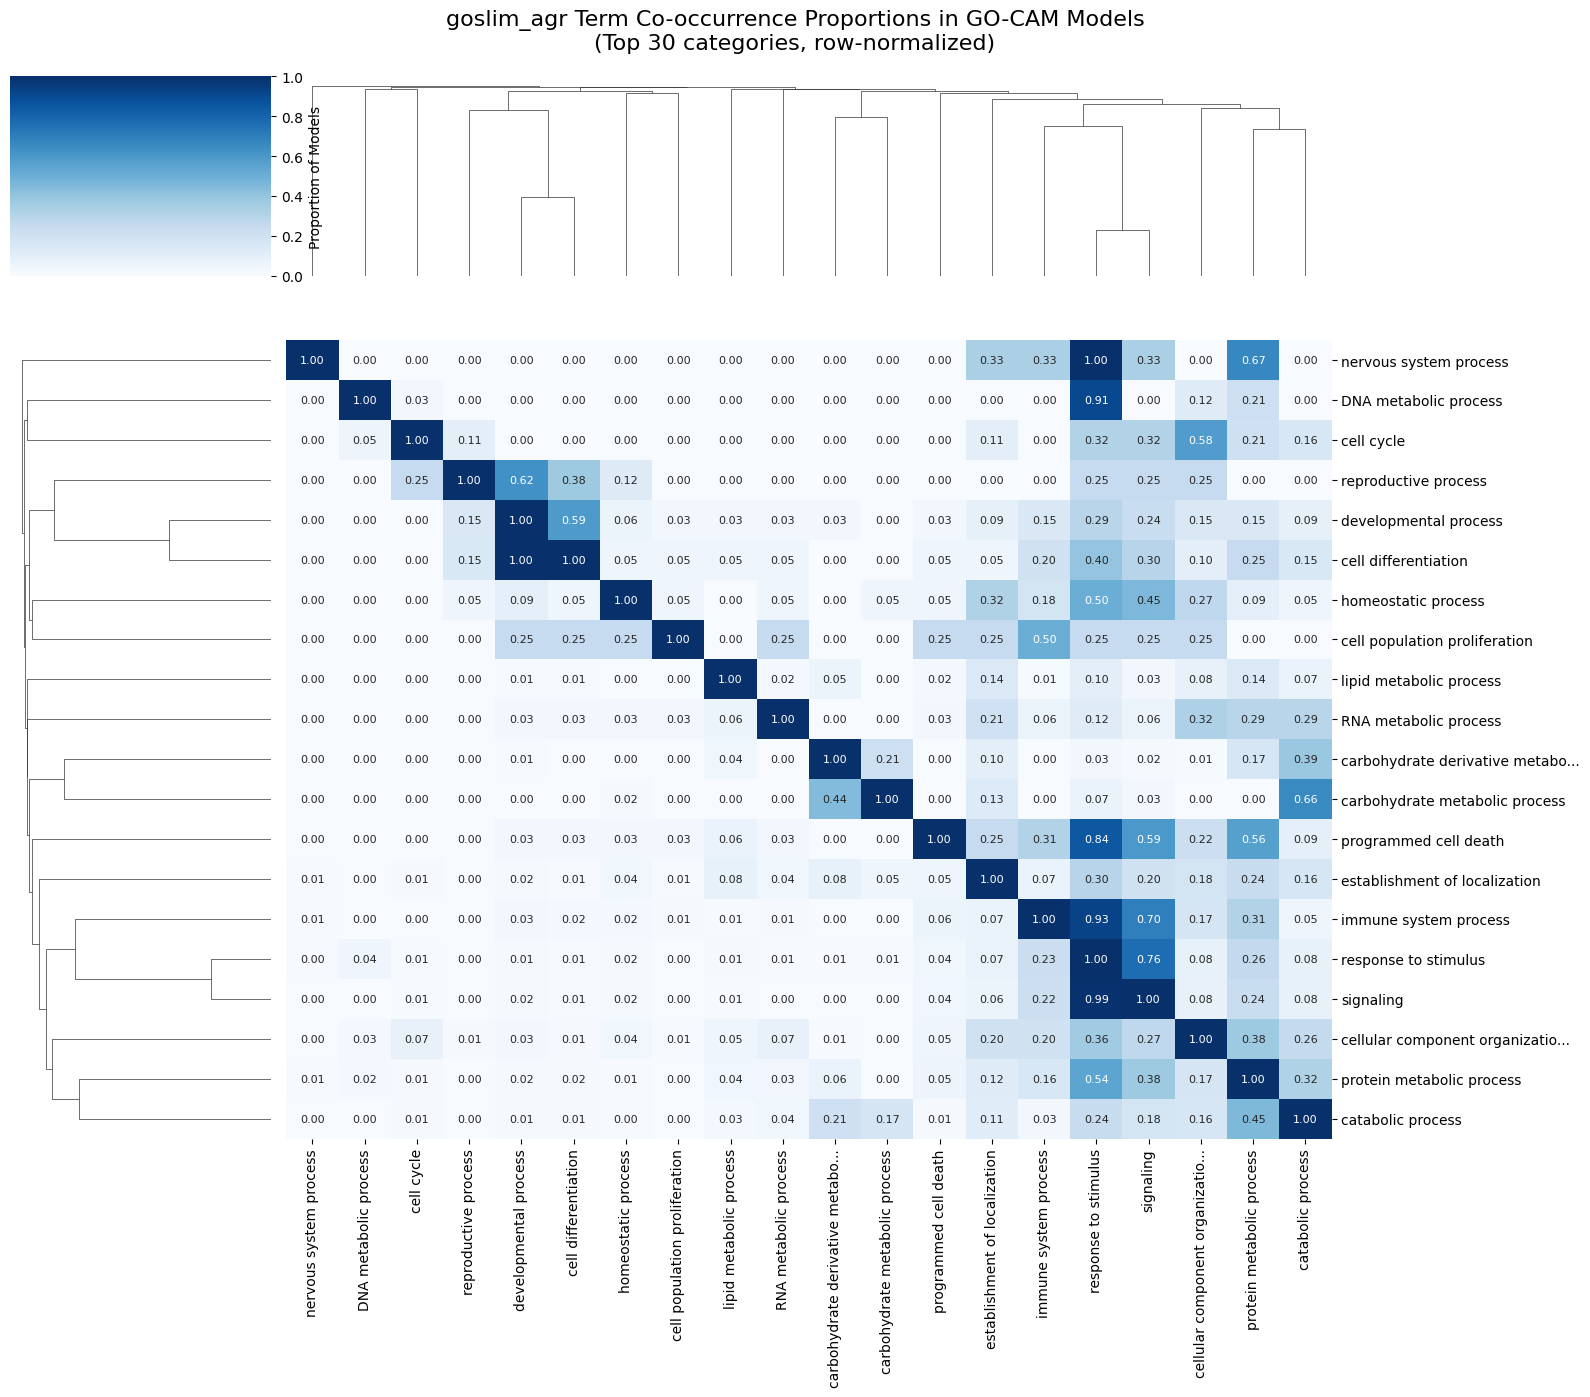

In [66]:
# Let's also create a normalized version to show the proportion of overlap
# This shows: for models with term X, what proportion also have term Y?

# Create normalized overlap matrix (row-wise normalization)
normalized_overlap = np.zeros_like(overlap_matrix)
for i in range(len(top_slim_terms)):
    row_sum = overlap_matrix[i, i]  # Number of models with this term
    if row_sum > 0:
        normalized_overlap[i, :] = overlap_matrix[i, :] / row_sum
    else:
        normalized_overlap[i, :] = 0

# Create the figure
plt.figure(figsize=(16, 14))

# Create clustermap with normalized values
g2 = sns.clustermap(normalized_overlap,
                    row_linkage=linkage,
                    col_linkage=linkage,
                    xticklabels=term_labels,
                    yticklabels=term_labels,
                    cmap='Blues',
                    annot=True,
                    fmt='.2f',
                    vmin=0,
                    vmax=1,
                    cbar_kws={'label': 'Proportion of Models'},
                    figsize=(16, 14),
                    annot_kws={'size': 8})

# Rotate labels for better readability
plt.setp(g2.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(g2.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

g2.fig.suptitle(f'{GOSLIM_SUBSET} Term Co-occurrence Proportions in GO-CAM Models\n(Top {top_n_overlap} categories, row-normalized)', 
                fontsize=16, y=0.995)

plt.tight_layout()
plt.savefig(f'gocam_{GOSLIM_SUBSET}_overlap_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

In [67]:
# Print some statistics about the overlap
print("Overlap Statistics:")
print("==================")

# Find pairs with highest overlap (excluding diagonal)
overlap_pairs = []
for i in range(len(top_slim_terms)):
    for j in range(i+1, len(top_slim_terms)):  # Only upper triangle
        overlap_pairs.append({
            'term1': goslim_labels.get(top_slim_terms[i], top_slim_terms[i]),
            'term2': goslim_labels.get(top_slim_terms[j], top_slim_terms[j]),
            'overlap': int(overlap_matrix[i, j]),
            'term1_count': int(overlap_matrix[i, i]),
            'term2_count': int(overlap_matrix[j, j]),
            'jaccard': overlap_matrix[i, j] / (overlap_matrix[i, i] + overlap_matrix[j, j] - overlap_matrix[i, j])
        })

# Sort by overlap count
overlap_pairs.sort(key=lambda x: x['overlap'], reverse=True)

print("\nTop 10 term pairs by overlap count:")
for i, pair in enumerate(overlap_pairs[:10]):
    print(f"{i+1}. {pair['term1'][:30]} & {pair['term2'][:30]}")
    print(f"   Overlap: {pair['overlap']} models (Jaccard: {pair['jaccard']:.3f})")
    print(f"   Individual counts: {pair['term1_count']}, {pair['term2_count']}")
    print()

# Export overlap matrix to CSV
overlap_df = pd.DataFrame(overlap_matrix, 
                         index=term_labels, 
                         columns=term_labels)
overlap_df.to_csv(f'gocam_{GOSLIM_SUBSET}_overlap_matrix.csv')
print(f"Overlap matrix saved to: gocam_{GOSLIM_SUBSET}_overlap_matrix.csv")

Overlap Statistics:

Top 10 term pairs by overlap count:
1. response to stimulus & signaling
   Overlap: 525 models (Jaccard: 0.758)
   Individual counts: 687, 531

2. response to stimulus & protein metabolic process
   Overlap: 180 models (Jaccard: 0.214)
   Individual counts: 687, 333

3. response to stimulus & immune system process
   Overlap: 157 models (Jaccard: 0.225)
   Individual counts: 687, 169

4. signaling & protein metabolic process
   Overlap: 125 models (Jaccard: 0.169)
   Individual counts: 531, 333

5. signaling & immune system process
   Overlap: 118 models (Jaccard: 0.203)
   Individual counts: 531, 169

6. protein metabolic process & catabolic process
   Overlap: 106 models (Jaccard: 0.229)
   Individual counts: 333, 235

7. response to stimulus & catabolic process
   Overlap: 56 models (Jaccard: 0.065)
   Individual counts: 687, 235

8. protein metabolic process & cellular component organizatio
   Overlap: 56 models (Jaccard: 0.132)
   Individual counts: 333, 148

